# What makes a TED Talk great? 

For the last 15 years, TED has gained tremendous traction on the web to reach millions through its insightful content from experts in all backgrounds. But what makes a TED Talk great? In this analysis, I look at outcomes and the variables that contribute to those outcomes. 

The metrics I use as successful outcomes are views count and number of comments. 

The variables that I explore are duration of the video, speaker's occupation, time of year the video was filmed and published, and associated tags.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('ted_main.csv')
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [2]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))


## Does the length of a video affect outcomes?

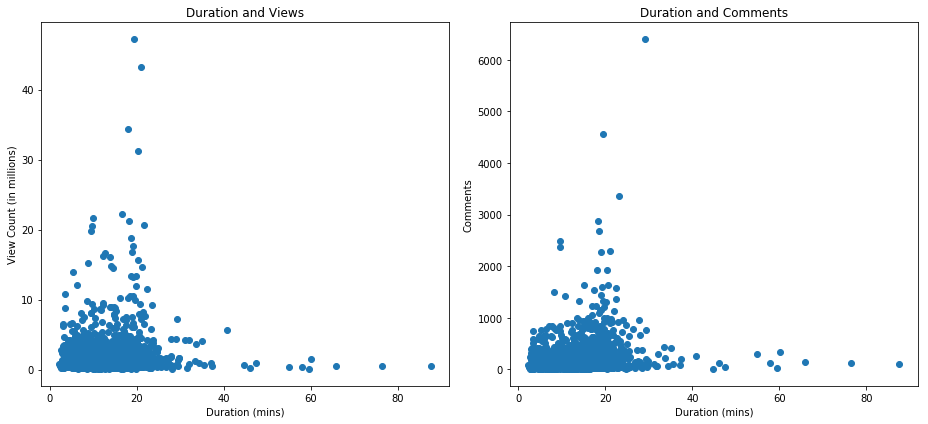

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [18]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
plt.scatter(x=df['duration']/60, y=df['views']/1000000)
plt.title('Duration and Views')
plt.ylabel('View Count (in millions)')
plt.xlabel('Duration (mins)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['duration']/60, y=df['comments'])
plt.title('Duration and Comments')
plt.ylabel('Comments')
plt.xlabel('Duration (mins)')

plt.tight_layout()
plt.show()

(df['duration']/60).describe()
#(df['views']/1000000).describe()

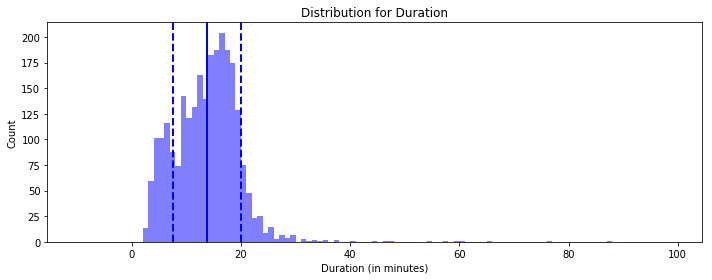

In [47]:
plt.figure(figsize=(10, 4))

plt.hist(x=df['duration']/60, color='blue', bins=np.arange(-10, 100), alpha=.5)
plt.title('Distribution for Duration')
plt.ylabel('Count')
plt.xlabel('Duration (in minutes)')

# Add a vertical line at the mean.
plt.axvline(13.775, color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(13.775 + 6.233, color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(13.775-6.233, color='b', linestyle='dashed', linewidth=2) 

# Print the histogram.
plt.tight_layout()
plt.show()

It appears that the length of TED Talks does not affect outcomes significantly. This is great news for a TED speaker because it means he or she does not have to compromise quality of content for time. However, most talks are between 9.61 minutes and 17.45 minutes long. And any video over 40 minutes typically get a lower number of views and comments made. 

## What do widely successful TED Talks have in common?

An analysis of outlier TED Talks and their characteristics.

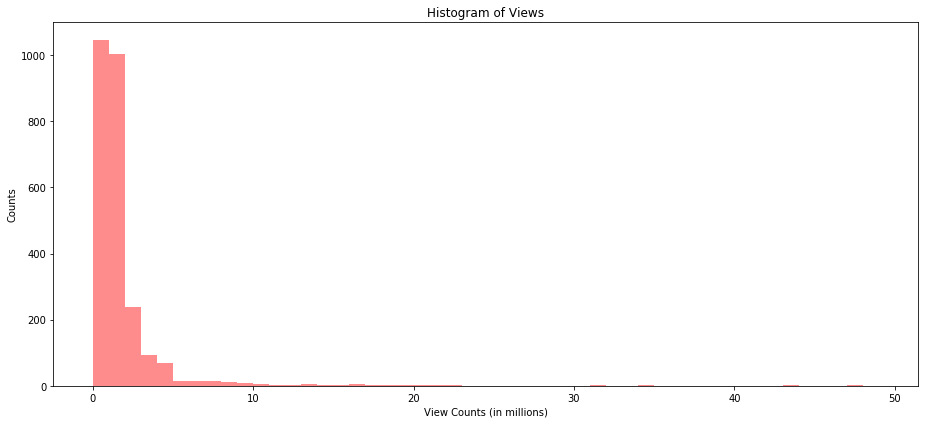

In [34]:
plt.figure(figsize=(13, 6))

plt.hist(df['views']/1000000, bins=np.arange(0, 50), color='red', alpha =.45)
plt.title('Histogram of Views')
plt.xlabel('View Counts (in millions)')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [6]:
count = 0

for view in df['views']:
    if view/1000000 > 20:
        count += 1
print(count)

9


After looking at the histogram above, the majority of videos received less than 5 million views. On the other hand, there are 9 videos that stood out as outliers receiving more than 20 million views. 

Are there common patterns amongst these 9 widely successful videos? What insights can we gain from these patterns on what makes a TED talk successful?

In [7]:
df[['title', 'duration', 'main_speaker','speaker_occupation', 'film_date', 'published_date', 'tags', 'views']].sort_values('views', ascending=False).head(9)

,title,duration,main_speaker,speaker_occupation,film_date,published_date,tags,views
0,Do schools kill creativity?,1164,Ken Robinson,Author/educator,24-02-2006,26-06-2006,"['children', 'creativity', 'culture', 'dance',...",47227110
1346,Your body language may shape who you are,1262,Amy Cuddy,Social psychologist,25-06-2012,01-10-2012,"['body language', 'brain', 'business', 'psycho...",43155405
677,How great leaders inspire action,1084,Simon Sinek,Leadership expert,16-09-2009,04-05-2010,"['TEDx', 'business', 'entrepreneur', 'leadersh...",34309432
837,The power of vulnerability,1219,Brené Brown,Vulnerability researcher,05-06-2010,23-12-2010,"['TEDx', 'communication', 'culture', 'depressi...",31168150
452,10 things you didn't know about orgasm,1003,Mary Roach,Writer,05-02-2009,19-05-2009,"['books', 'culture', 'history', 'humor', 'scie...",22270883
1776,How to speak so that people want to listen,598,Julian Treasure,Sound consultant,09-06-2013,27-06-2014,"['culture', 'sound', 'speech']",21594632
201,My stroke of insight,1099,Jill Bolte Taylor,Neuroanatomist,26-02-2008,11-03-2008,"['biology', 'brain', 'consciousness', 'global ...",21190883
5,Why we do what we do,1305,Tony Robbins,Life coach; expert in leadership psychology,01-02-2006,27-06-2006,"['business', 'culture', 'entertainment', 'goal...",20685401
2114,This is what happens when you reply to spam email,588,James Veitch,Comedian and writer,07-12-2015,08-01-2016,"['comedy', 'communication', 'curiosity', 'humo...",20475972


From the table above, it does not appear that there are common characteristics amongst a widely successful TED Talk (i.e. videos with more than 20 million views). 

One area I would like to explore is the tags associated with each video listed above. How would I be able to loop through the tags to see if there are commonalities in the topics associate with these videos that attract the most views? 

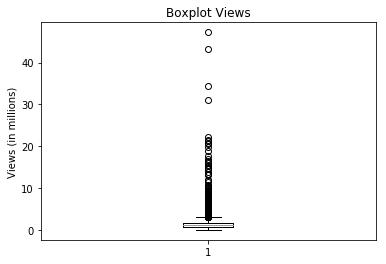

In [8]:
plt.boxplot(df['views']/1000000)
plt.title('Boxplot Views')
plt.ylabel('Views (in millions)')

plt.show()

Here's another way to illustrate the outliers using a boxplot. I didn't think this was very interesting because this data has been covered above. One way I wanted to use the boxplot to display meaningful data is to provide multiple boxplots using speaker's occupation in the X-axis. That way, the data would shed insight on how many views videos get depending on the background of the speaker.

## **Conclusion** 

For TED Talks with top 9 most views, the variables explored does not significantly contribute towards outcomes. This probably speaks to the importance of substantial content in TED talk videos and the opportunity the platform brings to connect with a wide-ranging audience regardless of background.

However, further analysis is needed. The next step in this research would be to look at the tag associated analysis to see if certain themese come up more frequently than others for most viewed videos. Also, doing a network analysis to see which videos are related with one another would be interesting to analyze how being related to one video may influence the traffic in another. 

Finally, it is important to note that the variable analysis done above was primarily for top 9 most viewed videos. For analysis conducted with the whole dataset, results on correlation between the variables explored and outcomes may provide different results than the one provided in this conclusion.